# Plot WordNet Affect usage

WordNet affect counts and dominance scores are precomputed. We provide the dominance scores for making the plots. To obtain WordNet domains, please see here: https://wndomains.fbk.eu/download.html

In [1]:
with open("../Data/wn-peer-mhp.tsv") as f:
    lines = f.read().strip().split('\n')

In [2]:
from operator import itemgetter

cat2score = {}
for l in lines:
    parts = l.split('\t')
    cat = parts[0]
    score = parts[1]  
    cat2score[cat] = float(score)
cat2score_sorted = sorted(cat2score.items(), key=itemgetter(1), reverse=True)

cat2score_sorted

[('DISGUST', 1.71028997750357),
 ('SURPRISE', 1.3983259978898),
 ('ANGER', 1.14086998542706),
 ('FEAR', 1.06922731579117),
 ('SADNESS', 1.06749537047073),
 ('JOY', 1.00660420378226)]

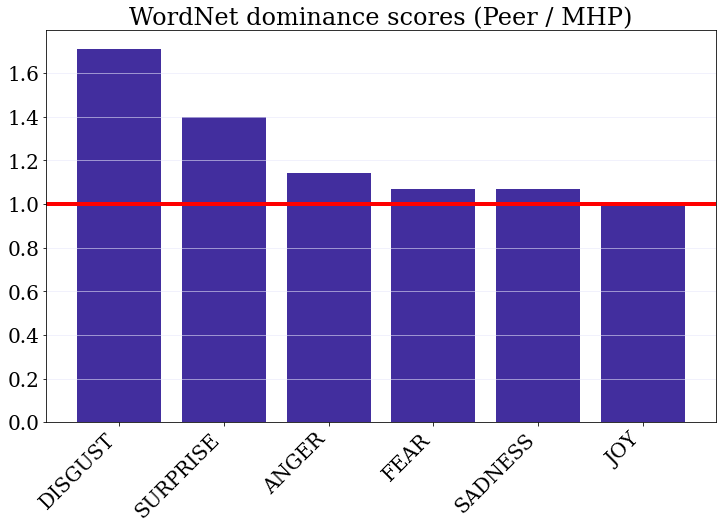

In [3]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({
    'font.family': 'serif',
    'font.size': 20
})

fig, axs = plt.subplots(1, 1, figsize=(12, 8), sharey=False)
axs.set_title('WordNet dominance scores (Peer / MHP)')

xticklabels, bars = zip(*cat2score_sorted)
xticks = range(1, len(bars) + 1)
yticks = [i/10 for i in range(int((min(bars) - .1) * 10), int((max(bars) + .1) * 10), 1)]

axs.set_xticks(range(1, len(bars) + 1), minor=False)
axs.set_xticklabels(xticklabels, minor=False)

axs.bar(range(1, len(bars) + 1), bars, color='#422e9e')
axs.grid(axis='y', alpha=0.7, color='lavender')
axs.axhline(y=1, linewidth=4, color='red')


fig.autofmt_xdate(rotation=45)

bar_coordinates = [(x, y) for x,y in zip(xticks, bars)]

In [4]:
coordinates = "\n".join([f"\t({label},{y})" for (x,y), label in zip(bar_coordinates, xticklabels)])
print(f"coordinates {'{'} \n{coordinates}\n{'};'}")

xcoords=",".join(xticklabels)
print(f"symbolic x coords=({xcoords})")

print(f"ytick={'{'}{str(yticks)[1:-1]}{'}'}")

coordinates { 
	(DISGUST,1.71028997750357)
	(SURPRISE,1.3983259978898)
	(ANGER,1.14086998542706)
	(FEAR,1.06922731579117)
	(SADNESS,1.06749537047073)
	(JOY,1.00660420378226)
};
symbolic x coords=(DISGUST,SURPRISE,ANGER,FEAR,SADNESS,JOY)
ytick={0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7}
